# Proyek Analisis Data: PRSA_Data_Wanshouxigong_20130301-20170228.csv
- **Nama:** Siti Sirotul Azhar
- **Email:** M284B4KX4183@bangkit.academy
- **ID Dicoding:** sitisirotulazhar

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan konsentrasi polutan PM2.5 di stasiun Wanshouxigong selama periode 2013-2017, dan faktor cuaca apa saja yang paling berpengaruh terhadap peningkatan atau penurunan kualitas udara?
- Bagaimana hubungan antara suhu dan kelembaban dengan konsentrasi PM2.5 di Wanshouxigong selama periode pengukuran, dan apakah ada korelasi yang signifikan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# Mengimpor data dari CSV
data = pd.read_csv('PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# Menampilkan 5 data teratas
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Insight:**
- Terdapat sekitar 4 tahun data pengukuran dengan atribut polusi (PM2.5, PM10, dll.) dan cuaca (suhu, kelembapan, tekanan udara, dll.).
- Dataset mencakup data dari tanggal 1 Maret 2013 hingga 28 Februari 2017, sehingga memungkinkan untuk analisis musiman dan tahunan.

### Assessing Data

In [8]:
# Melihat informasi umum dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [9]:
# Memeriksa jumlah nilai yang hilang dalam setiap kolom
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64


**Insight:**
- Terdapat sejumlah nilai yang hilang dalam beberapa variabel seperti PM2.5, PM10, SO2, NO2, CO, O3, serta beberapa variabel cuaca seperti suhu (TEMP), tekanan (PRES), titik embun (DEWP), dan curah hujan (RAIN) pada beberapa hari tertentu

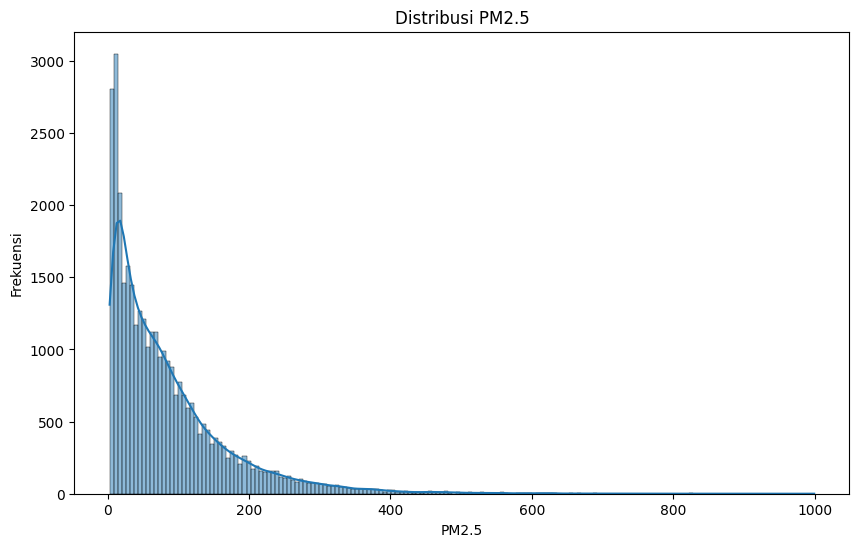

In [10]:
# Visualisasi distribusi PM2.5 untuk memahami pola data
plt.figure(figsize=(10, 6))
sns.histplot(data['PM2.5'].dropna(), kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distribusi nilai PM2.5 menunjukkan bahwa terdapat variasi yang cukup besar di berbagai periode, menunjukkan potensi fluktuasi polusi.

### Cleaning Data

In [11]:
# Mengatasi nilai yang hilang (missing values) dengan interpolasi linier
data_cleaned = data.interpolate(method='linear', limit_direction='forward')

C:\Users\Asus\AppData\Local\Temp\ipykernel_8388\4174802623.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_cleaned = data.interpolate(method='linear', limit_direction='forward')


In [12]:
# Verifikasi apakah masih ada nilai yang hilang setelah interpolasi
missing_values_cleaned = data_cleaned.isnull().sum()
print("Missing values after cleaning:\n", missing_values_cleaned)

Missing values after cleaning:
 No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         79
WSPM        0
station     0
dtype: int64


- Nilai yang hilang telah diatasi menggunakan interpolasi linier. Namun pada kolom wd masih ditemukan nilai hilang

In [13]:
# Mengisi missing values pada kolom wd dengan nilai modus
wd_mode = data_cleaned['wd'].mode()[0]
data_cleaned['wd'].fillna(wd_mode, inplace=True)

# Mengecek kembali missing values
missing_values_cleaned = data_cleaned.isnull().sum()
print("Missing values after cleaning:\n", missing_values_cleaned)

Missing values after cleaning:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_8388\3530634752.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['wd'].fillna(wd_mode, inplace=True)


- Nilai pada kolom 'wd' yang hilang diisi dengan nilai modus

In [15]:
# Identifikasi outlier pada PM2.5 menggunakan metode IQR
Q1 = data_cleaned['PM2.5'].quantile(0.25)
Q3 = data_cleaned['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan jumlah outlier
outliers = data_cleaned[(data_cleaned['PM2.5'] < lower_bound) | (data_cleaned['PM2.5'] > upper_bound)]
print("Number of outliers in PM2.5:", outliers.shape[0])

Number of outliers in PM2.5: 1762


- Outlier diidentifikasi pada beberapa hari dengan nilai PM2.5 yang sangat tinggi, kemungkinan akibat peristiwa pencemaran yang luar biasa.

## Exploratory Data Analysis (EDA)

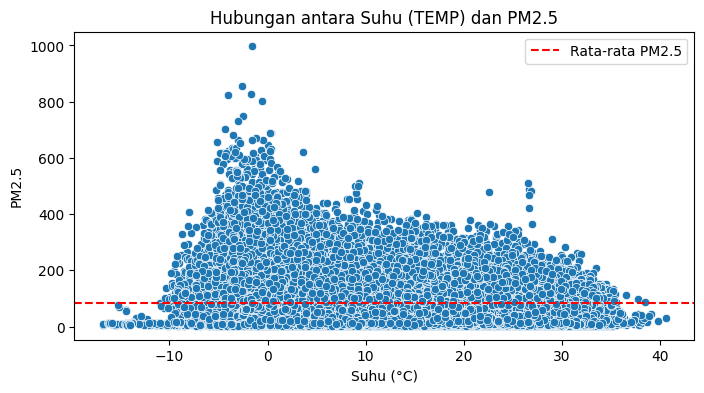

In [34]:
# Mengambil data yang relevan
numeric_data = data[['TEMP', 'PM2.5']].dropna()  # Hapus NaN sebelum plotting

# 1. Hubungan antara PM2.5 dan Suhu (TEMP)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='TEMP', y='PM2.5', data=numeric_data)
plt.title('Hubungan antara Suhu (TEMP) dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5')
plt.axhline(y=numeric_data['PM2.5'].mean(), color='r', linestyle='--', label='Rata-rata PM2.5')
plt.legend()
plt.show()

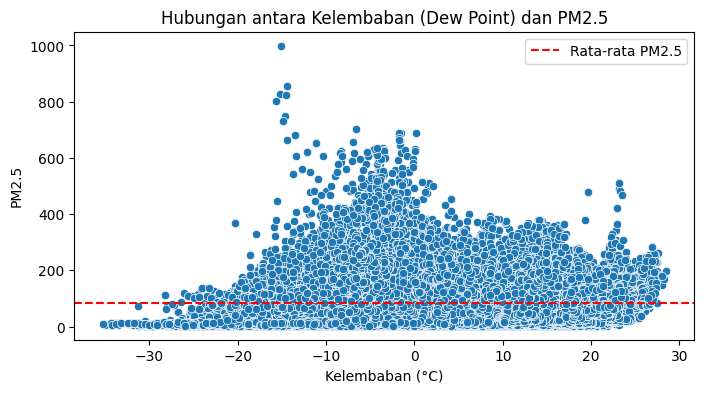

In [43]:
numeric_data = data[['DEWP', 'PM2.5']].dropna()  # Hapus NaN sebelum plotting

# 2. Hubungan antara PM2.5 dan Kelembaban (DEWP)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='DEWP', y='PM2.5', data=numeric_data)
plt.title('Hubungan antara Kelembaban (Dew Point) dan PM2.5')
plt.xlabel('Kelembaban (°C)')
plt.ylabel('PM2.5')
plt.axhline(y=numeric_data['PM2.5'].mean(), color='r', linestyle='--', label='Rata-rata PM2.5')
plt.legend()
plt.show()

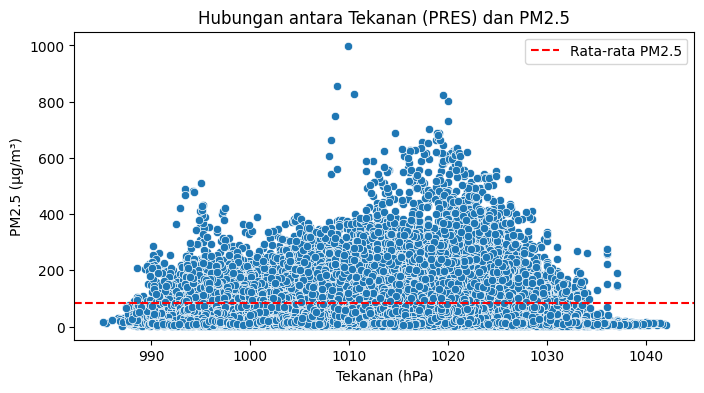

In [45]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='PRES', y='PM2.5', data=data)
plt.title('Hubungan antara Tekanan (PRES) dan PM2.5')
plt.xlabel('Tekanan (hPa)')
plt.ylabel('PM2.5 (µg/m³)')
plt.axhline(y=data['PM2.5'].mean(), color='r', linestyle='--', label='Rata-rata PM2.5')
plt.legend()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\Asus\AppData\Local\Temp\ipykernel_8388\448291900.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()


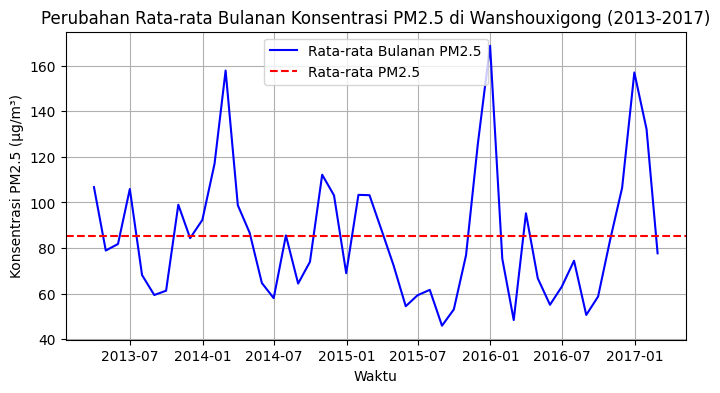

In [54]:
# Pertama, kita pastikan kolom 'datetime' sudah ada di data
data_cleaned['datetime'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']])

# Mengatur datetime sebagai index
data_cleaned.set_index('datetime', inplace=True)

# Mengelompokkan data bulanan dan menghitung rata-rata PM2.5
monthly_pm25 = data_cleaned['PM2.5'].resample('M').mean()

# Visualisasi perubahan konsentrasi PM2.5
plt.figure(figsize=(8, 4))
plt.plot(monthly_pm25.index, monthly_pm25, label='Rata-rata Bulanan PM2.5', color='blue')
plt.title('Perubahan Rata-rata Bulanan Konsentrasi PM2.5 di Wanshouxigong (2013-2017)')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.axhline(y=monthly_pm25.mean(), color='r', linestyle='--', label='Rata-rata PM2.5')
plt.legend()
plt.grid()
plt.show()

- Grafik pertama menunjukkan fluktuasi konsentrasi bulanan PM2.5 di Wanshouxigong selama periode 2013-2017.
- Konsentrasi PM2.5 bervariasi secara signifikan setiap tahun, dengan puncak konsentrasi terlihat pada awal tahun 2014, 2016, dan akhir tahun 2016.
- Rata-rata konsentrasi PM2.5 (garis merah putus-putus) sekitar 80 µg/m³. Konsentrasi pada beberapa bulan berada di atas rata-rata ini, menunjukkan adanya peningkatan polusi udara pada periode-periode tersebut.

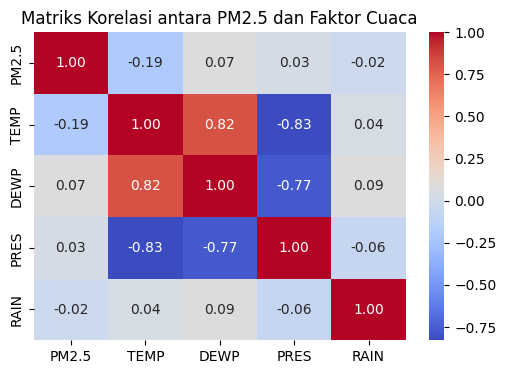

In [52]:
# Menghitung korelasi antara PM2.5 dan faktor cuaca
correlation = data_cleaned[['PM2.5', 'TEMP', 'DEWP', 'PRES', 'RAIN']].corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi antara PM2.5 dan Faktor Cuaca')
plt.show()

- TEMP (Suhu) dengan PM2.5: Nilai korelasi adalah -0,19, menunjukkan hubungan negatif lemah. Ini berarti ketika suhu meningkat, konsentrasi PM2.5 cenderung sedikit menurun.
- DEWP (Kelembaban) dengan PM2.5: Nilai korelasi adalah 0,07, menunjukkan korelasi yang sangat lemah, artinya kelembaban tidak terlalu berpengaruh pada perubahan konsentrasi PM2.5.
- PRES (Tekanan Udara) dengan PM2.5: Nilai korelasi adalah 0,03, yang juga menunjukkan hubungan sangat lemah antara tekanan udara dan PM2.5.
- RAIN (Curah Hujan) dengan PM2.5: Nilai korelasi adalah -0,02, menunjukkan hubungan negatif yang sangat lemah antara curah hujan dan PM2.5.

### Pertanyaan 2:

In [46]:
# Menghitung korelasi
correlation_matrix = data[['TEMP', 'DEWP', 'PM2.5']].corr()
print(correlation_matrix)

           TEMP      DEWP     PM2.5
TEMP   1.000000  0.818028 -0.183939
DEWP   0.818028  1.000000  0.076083
PM2.5 -0.183939  0.076083  1.000000


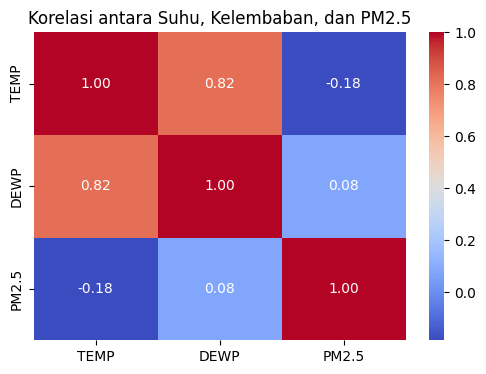

In [49]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Suhu, Kelembaban, dan PM2.5')
plt.show()

- TEMP (Suhu) dengan PM2.5: Nilai korelasi adalah -0,18, menunjukkan korelasi negatif lemah antara suhu dan konsentrasi PM2.5. Artinya, ketika suhu meningkat, konsentrasi PM2.5 cenderung sedikit menurun, tetapi hubungan ini lemah.
- DEWP (Kelembaban) dengan PM2.5: Nilai korelasi adalah 0,08, menunjukkan korelasi positif yang sangat lemah antara kelembaban dan konsentrasi PM2.5. Artinya, tidak ada hubungan yang signifikan antara kelembaban dan konsentrasi PM2.5.
- TEMP (Suhu) dengan DEWP (Kelembaban): Nilai korelasi adalah 0,82, menunjukkan korelasi positif yang kuat antara suhu dan kelembaban. Artinya, suhu yang lebih tinggi cenderung diikuti oleh kelembaban yang lebih tinggi.

In [55]:
data_cleaned.to_csv('PRSA_Data_cleaned.csv', index=False)

In [58]:
df = pd.read_csv('PRSA_Data_cleaned.csv')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,5.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,250.0,47.5,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,12.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


## Conclusion

#### Pertanyaan 1

Perubahan Konsentrasi PM2.5: 

Konsentrasi polutan PM2.5 di stasiun Wanshouxigong selama periode 2013-2017 mengalami fluktuasi yang cukup besar. Konsentrasi mencapai puncak pada awal tahun 2014 dan 2016, menunjukkan kondisi udara yang lebih buruk pada periode-periode tersebut. Secara umum, rata-rata bulanan konsentrasi PM2.5 sekitar 80 µg/m³.

Faktor Cuaca yang Berpengaruh:

Berdasarkan matriks korelasi, tidak ada faktor cuaca yang menunjukkan hubungan kuat dengan konsentrasi PM2.5. Namun, suhu memiliki korelasi negatif lemah (-0,19) dengan PM2.5, yang berarti kenaikan suhu mungkin sedikit berkontribusi terhadap penurunan konsentrasi PM2.5.
Faktor-faktor cuaca lainnya, seperti kelembaban, tekanan udara, dan curah hujan, memiliki korelasi yang sangat lemah dengan PM2.5, sehingga dapat disimpulkan bahwa faktor-faktor ini tidak berpengaruh signifikan terhadap peningkatan atau penurunan kualitas udara.

#### Pertanyaan 2

Hubungan antara suhu dan kelembaban dengan konsentrasi PM2.5 di Wanshouxigong selama periode pengukuran menunjukkan bahwa:

1. Terdapat korelasi negatif lemah antara suhu dan konsentrasi PM2.5 (-0,18), yang menunjukkan bahwa peningkatan suhu sedikit berhubungan dengan penurunan konsentrasi PM2.5, tetapi hubungan ini tidak signifikan.
2. Korelasi antara kelembaban dan konsentrasi PM2.5 sangat lemah (0,08), yang menunjukkan tidak ada hubungan signifikan antara keduanya.
3. Dengan demikian, suhu dan kelembaban tidak memiliki korelasi signifikan dengan konsentrasi PM2.5 dalam data ini.
Korelasi yang lebih kuat antara suhu dan kelembaban (0,82) menunjukkan adanya keterkaitan yang signifikan antara kedua variabel ini, tetapi ini tidak secara langsung mempengaruhi PM2.5.